In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [4]:
exps = pd.read_csv('_measures/1698330014-experiments.csv')
data = pd.read_csv('_measures/1698330014-data.csv')

exps['target_usage'] = exps['target_core']*(exps['target_level']/100)
exps['noise_usage']  = exps['noise_core']*(exps['noise_level']/100)

dataset = exps.merge(data, left_on='measure_id', right_on='measure_id', validate='1:m')

In [ ]:
dataset.head()

# Generate some graphs on exp dataset (general values)

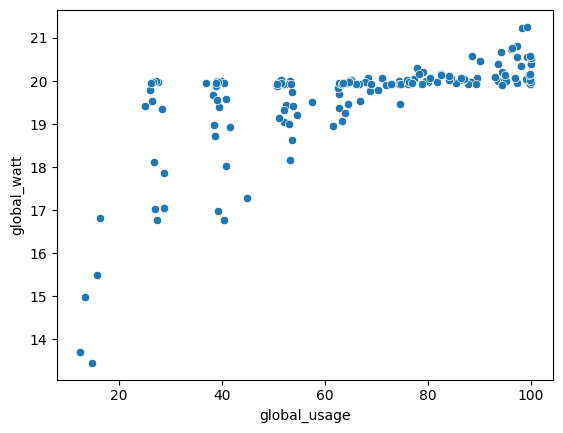

In [4]:
ax = sns.scatterplot(exps, x='global_usage', y='global_watt')

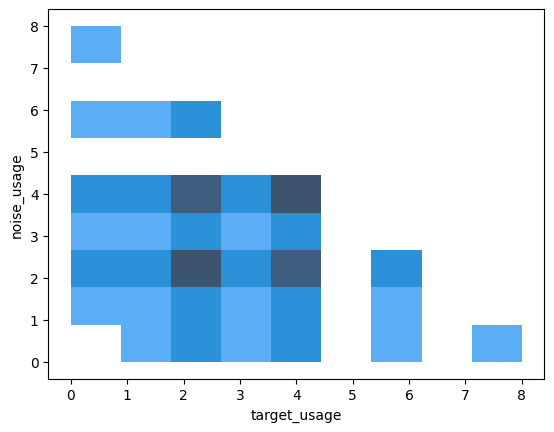

In [5]:
ax = sns.histplot(exps, x='target_usage', y='noise_usage')

# Generate some graphs on data

Groundthruth : process running alone

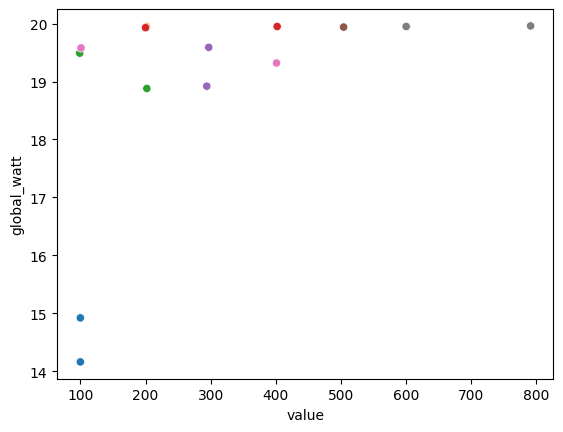

In [5]:
groundthruth = dataset.loc[dataset['noise_core'] <=0]
groundthruth_process = groundthruth.loc[groundthruth['type'] == 'process']

groundthruth_process_sum = groundthruth_process.groupby(['situation_id', 'global_watt'], as_index=False)['value'].sum()
g = sns.scatterplot(groundthruth_process_sum, x='value', y='global_watt', hue='situation_id')
g.legend().remove()

Training : process running jointly with noise

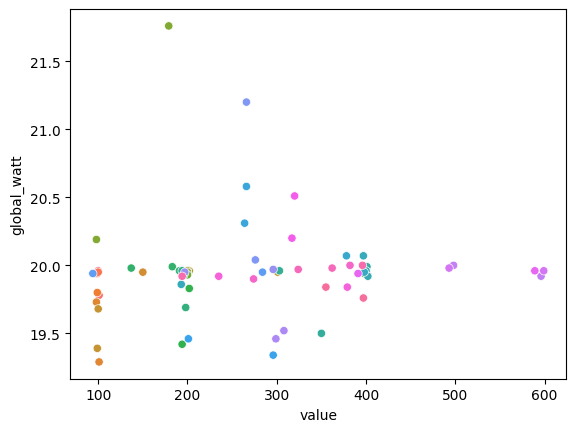

In [6]:
training = dataset.loc[dataset['noise_core'] >0]
training_process = training.loc[training['type'] == 'process']

training_process_sum = training_process.groupby(['situation_id', 'global_watt'], as_index=False)['value'].sum()
g = sns.scatterplot(training_process_sum, x='value', y='global_watt', hue='situation_id')
g.legend().remove()

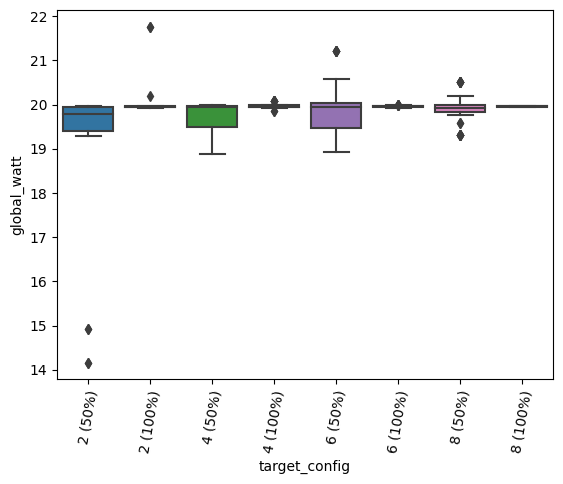

In [25]:
pd.options.mode.chained_assignment = None
process = dataset.loc[dataset['type'] == 'process']
process['target_config'] = process.apply(lambda row: str(row['target_core']) + ' (' + str(row['target_level']) + '%)',axis=1)

g = sns.boxplot(x="target_config", y="global_watt", data=process)
t = plt.xticks(rotation = 80)